# Linear & polynomial classification problem

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
data=[]

f= open('data1.csv', 'r')
reader= csv.reader(f)
for line in reader:
    data.append(line)
f.close()

In [5]:
for i in range(len(data)):
    data[i]=list(map(float, data[i]))
    


In [6]:
data_0=[]
data_1=[]

for d in data:
    if d[2]==0:
        data_0.append(d)
    elif d[2]==1:
        data_1.append(d)

In [7]:
data_0_np=np.array(data_0)
data_1_np=np.array(data_1)


data_np=np.array(data)


In [8]:
X1_0=np.array([data_0_np[:,0]]).transpose()
X1_1=np.array([data_1_np[:,0]]).transpose()
X2_0=np.array([data_0_np[:,1]]).transpose()
X2_1=np.array([data_1_np[:,1]]).transpose()
y_0=np.array([data_0_np[:,2]]).transpose()
y_1=np.array([data_1_np[:,2]]).transpose()
X_0=np.array(data_0_np[:,:2])
X_1=np.array(data_1_np[:,:2])

X1=np.array([data_np[:,0]]).transpose()
X2=np.array([data_np[:,1]]).transpose()
X=np.append(np.ones((np.array(data_np[:,:2]).shape[0],1)),np.array(data_np[:,:2]), 1)
y=np.array([data_np[:,2]]).transpose()

initial_theta=np.zeros([X.shape[1], 1])

# normalizing

In [9]:
X_norm=np.ones(X.shape)
for i in range(1, X.shape[1]):
    X_norm[:,i]=(X[:,i]-(X[:,i].sum()/X[:,i].shape[0]))/(X[:,i].max()-X[:,i].min())

In [11]:
X3=X1**2
X4=X2**2
X5=X1*X2
X_poly=np.append(X, X3,1)
X_poly=np.append(X_poly, X4, 1)
X_poly=np.append(X_poly, X5, 1)

In [12]:
X_poly_norm=np.ones(X_poly.shape)
for i in range(1, X_poly.shape[1]):
    X_poly_norm[:,i]=(X_poly[:,i]-(X_poly[:,i].sum()/X_poly[:,i].shape[0]))/(X_poly[:,i].max()-X_poly[:,i].min())

# data plotting

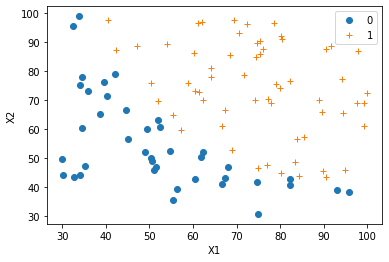

In [13]:
plt.plot(X1_0, X2_0, 'o', label='0')
plt.plot(X1_1, X2_1, '+', label='1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [14]:
def sigmoid(z):
    if(type(z)!=np.ndarray):
        try:
            return 1/(1+math.exp(-z))
        except OverflowError:
            return float('inf')
    else:
        g=np.zeros(z.shape)
        for i in range(z.shape[0]):
            try:
                g[i]=1/(1+math.exp(-z[i]))
            except OverflowError:
                g[i]=float('inf')
        return g
    
def log(x): #input type = np.ndarray, return type = np.ndarray
    g=np.zeros(x.shape)
    for i in range(x.shape[0]):
        try:
            g[i]=math.log(x[i])
        except OverflowError:
            g[i] = float('inf')
    return g

def costFunction(theta, X, y):
    m=y.shape[0]
    grad=np.zeros(theta.shape[0])
    J=(1/m)*(-np.dot(y.transpose(), log(sigmoid(np.dot(X, theta)))) - (np.dot((1-y).transpose(), log(1-sigmoid(np.dot(X, theta))))))
    grad=((1/m)*np.dot((sigmoid(np.dot(X, theta))-y).transpose(),X)).transpose()
    
    return [float(J), grad]

def forward(X, theta):
    return sigmoid(np.dot(X, theta))

def train(X, y):
    theta=np.zeros([X.shape[1], 1])
    print('Training start\tJ=', costFunction(theta, X, y)[0])
    print('grad :', costFunction(theta, X, y)[1])
    for epoch in range(1, epochs+1):
        [J, grad] = costFunction(theta, X, y)
        theta = theta- lr*grad
        
        if(epoch%(epochs/10)==0):
            print("epoch:", epoch, "cost:", J)
            print("theta:", theta)
            
    return theta

# 학습되지 않은 decision boundary

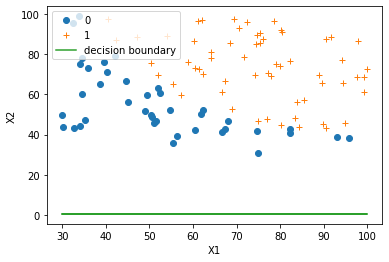

In [15]:
plt.plot(X1_0, X2_0, 'o', label='0')
plt.plot(X1_1, X2_1, '+', label='1')
plt.plot(X1, forward(X, initial_theta), label='decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [17]:
epochs=30000
lr=0.01
theta=train(X_norm, y)

Training start	J= 0.6931471805599452
grad : [[-0.1       ]
 [-0.0780402 ]
 [-0.06797865]]
epoch: 3000 cost: 0.471893765127116
theta: [[0.43692905]
 [1.82172872]
 [1.60948626]]
epoch: 6000 cost: 0.3877764093340102
theta: [[0.49730519]
 [2.99049173]
 [2.67040602]]
epoch: 9000 cost: 0.3432731922833684
theta: [[0.5559606 ]
 [3.83514885]
 [3.45139682]]
epoch: 12000 cost: 0.3157448222755245
theta: [[0.60932883]
 [4.49607447]
 [4.07030621]]
epoch: 15000 cost: 0.29695537304013064
theta: [[0.65748465]
 [5.0398859 ]
 [4.58431214]]
epoch: 18000 cost: 0.28326068480024524
theta: [[0.70108941]
 [5.50262516]
 [5.02483946]]
epoch: 21000 cost: 0.2728061380144123
theta: [[0.74081163]
 [5.90584517]
 [5.41089946]]
epoch: 24000 cost: 0.2645473476585533
theta: [[0.77722288]
 [6.26343089]
 [5.7548535 ]]
epoch: 27000 cost: 0.25784992867234946
theta: [[0.81079274]
 [6.5848483 ]
 [6.06519562]]
epoch: 30000 cost: 0.25230532236883785
theta: [[0.84190413]
 [6.87684246]
 [6.34802109]]


gradient descent 방식으로 하니까 learning rate 선정도 까다롭고, 학습속도도 너무 느리다. 다른 방식을 써야 하나 싶다

In [319]:
expected_theta=np.array([[-25.161], [0.206], [0.201]])

In [29]:
plot_x=([X[:,1].min()-2, X[:,1].max()+2])
avg=[X[:,1].sum()/X[:,1].shape[0], X[:,1].sum()/X[:,1].shape[0]]
plot_y=(-1/theta[2])*(theta[1]*(plot_x-avg)+theta[0])+[sum([X[:,2].min()-2, X[:,2].max()+2])/2,sum([X[:,2].min()-2, X[:,2].max()+2])/2]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [31]:
plot_y

array([ -30.52888501, -110.44324382])

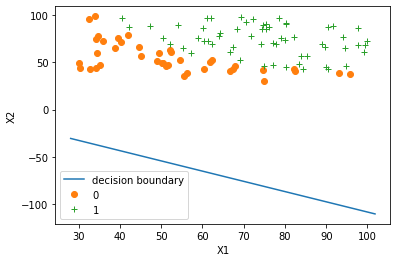

In [19]:
plt.plot(plot_x, plot_y, label='decision boundary')
plt.plot(X1_0, X2_0, 'o', label='0')
plt.plot(X1_1, X2_1, '+', label='1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [384]:
forward([1,100,100], theta)

array([0.99999799])

In [389]:
epochs=100000
lr=0.01
theta_norm = train(X_poly_norm, y)

Training start	J= 0.6931471805599452
grad : [[-0.1       ]
 [-0.0780402 ]
 [-0.06797865]
 [-0.07399532]
 [-0.06750749]
 [-0.09298631]]
epoch: 10000 cost: 0.2620706805140113
theta: [[0.88546151]
 [2.4845781 ]
 [2.18437584]
 [2.14355949]
 [1.97972719]
 [3.08704124]]
grad [[-0.0036639 ]
 [-0.01066967]
 [-0.00972413]
 [-0.00747988]
 [-0.00728414]
 [-0.01491623]]
epoch: 20000 cost: 0.23086484889593387
theta: [[1.16385797]
 [3.26268773]
 [2.90563724]
 [2.60611337]
 [2.44837546]
 [4.26834418]]
grad [[-0.00215821]
 [-0.00586524]
 [-0.0055131 ]
 [-0.00273006]
 [-0.00292826]
 [-0.00975763]]
epoch: 30000 cost: 0.21775829901332053
theta: [[1.34385679]
 [3.74770187]
 [3.36398134]
 [2.77877957]
 [2.6452384 ]
 [5.13486643]]
grad [[-0.00151398]
 [-0.00405429]
 [-0.00384751]
 [-0.00094183]
 [-0.00121095]
 [-0.007806  ]]
epoch: 40000 cost: 0.2098763519352039
theta: [[1.47590395]
 [4.10046306]
 [3.69939433]
 [2.82143565]
 [2.71594925]
 [5.85808107]]
grad [[-1.15712566e-03]
 [-3.08563617e-03]
 [-2.9384689

In [391]:
res=forward(X_poly_norm, theta_norm)

for i in range(len(res)):
    if(res[i]>=0.5):
        res[i]=1
    else:
        res[i]=0

In [1]:
def plotDEcisionBoundary(theta, degree, axes):
    u=np.linspace(-1, 1.5, 50)
    v=np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

In [3]:
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter(components.loc[pos, 'feature 1'], components.loc[pos, 'feature 2'], color = 'r', marker='x', label='Faulty')
axes.scatter(components.loc[neg, 'feature 1'], components.loc[neg, 'feature 2'], color = 'g', marker='o', label='Good')
#axes.legend(title='Legend', loc = 'best' )

degree=2

plotDecisionBoundary(theta, degree, axes)

NameError: name 'plt' is not defined